# Get Data
ทำการโหลดข้อมูลจากไฟล์ที่ต้องการมา

In [58]:
import pandas as pd

df = pd.read_csv("export-A9D65F26F0B9-1h.csv")

In [59]:
df.head()

,Unnamed: 0,timestamp,timezone,humidity,pm_10,pm_2_5,temperature
0,0,2021-02-11 12:00:00,Asia/Bangkok,72.026242,11.666667,10.563218,30.703949
1,1,2021-02-11 13:00:00,Asia/Bangkok,71.049230,10.465517,9.500000,30.923300
2,2,2021-02-11 14:00:00,Asia/Bangkok,68.774313,33.646552,24.765217,31.392388
3,3,2021-02-11 15:00:00,Asia/Bangkok,66.983002,11.017241,10.025862,32.060417
4,4,2021-02-11 16:00:00,Asia/Bangkok,69.181462,10.241379,9.465517,31.455106


# Clean Data
ทำการตรวจสอบข้อมูลที่ขาดหายและดูรายละเอียดที่แปลกๆเพื่อลบค่าที่ไม่จำเป็นทิ้ง

In [60]:
df.describe()

,Unnamed: 0,humidity,pm_10,pm_2_5,temperature
count,34633.000000,34632.000000,34633.000000,34633.000000,34631.000000
mean,17316.000000,81.578678,19.258648,17.138551,28.475783
std,9997.830273,10.840317,17.874537,15.299685,3.027300
min,0.000000,27.475060,0.000000,0.000000,21.021725
25%,8658.000000,74.642789,6.300000,5.681034,26.121630
50%,17316.000000,85.083209,13.398374,12.487179,27.652360
75%,25974.000000,89.880230,27.315789,25.443478,30.468968
max,34632.000000,99.401813,299.307692,255.452991,39.517640


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34633 entries, 0 to 34632
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   34633 non-null  int64  
 1   timestamp    34633 non-null  object 
 2   timezone     34633 non-null  object 
 3   humidity     34632 non-null  float64
 4   pm_10        34633 non-null  float64
 5   pm_2_5       34633 non-null  float64
 6   temperature  34631 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.8+ MB


In [62]:
# drop data
df.dropna(inplace=True)

In [63]:
df.isna().sum()

Unnamed: 0     0
timestamp      0
timezone       0
humidity       0
pm_10          0
pm_2_5         0
temperature    0
dtype: int64

In [64]:
df.drop(columns=["Unnamed: 0", "timezone", "pm_10"],inplace=True)

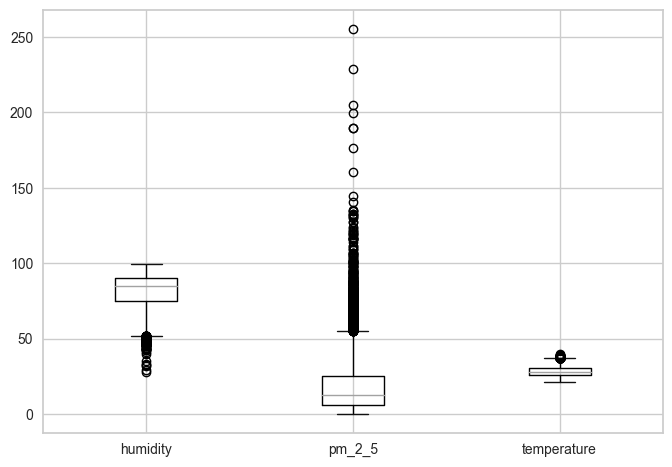

In [65]:
import matplotlib.pyplot as plt

df.boxplot()
plt.show()

In [66]:
# ฟังก์ชันลบค่าผิดปกติด้วย IQR (Interquartile Range)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


# ลบค่าผิดปกติจาก humidity, temperature และ pm_2_5
for col in ["humidity", "temperature", "pm_2_5"]:
    df = remove_outliers(df, col)

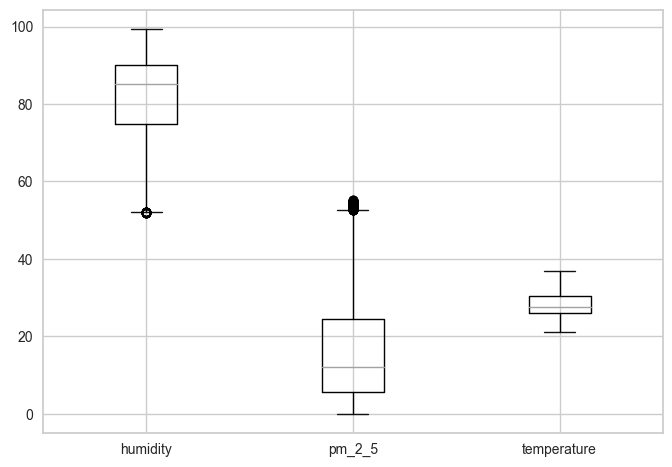

In [67]:
df.boxplot()
plt.show()

In [68]:
# Display basic information
df.info()
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 33705 entries, 0 to 34632
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    33705 non-null  object 
 1   humidity     33705 non-null  float64
 2   pm_2_5       33705 non-null  float64
 3   temperature  33705 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.3+ MB
           humidity        pm_2_5   temperature
count  33705.000000  33705.000000  33705.000000
mean      81.829309     16.056755     28.424988
std       10.588019     12.901705      2.959953
min       51.804853      0.000000     21.230174
25%       74.876113      5.581197     26.107155
50%       85.274629     12.166667     27.619385
75%       89.987301     24.436893     30.429019
max       99.401813     55.181034     36.856814


In [69]:
df["timestamp"] = pd.to_datetime(df["timestamp"])  # แปลงให้เป็น datetime


# Feature Engineering

In [70]:
# Extract time features
df["hour"] = df["timestamp"].dt.hour
df["day"] = df["timestamp"].dt.day
df["month"] = df["timestamp"].dt.month
df["day_of_week"] = df["timestamp"].dt.dayofweek

In [71]:
# สร้าง Lag Features
df[f"pm_2_5_lag 1 h"] = df["pm_2_5"].shift(1)
df["pm_2_5_ma3h"] = df["pm_2_5"].rolling(window=3).mean()

In [72]:
df.dropna(inplace=True)  # ลบ missing values ที่เกิดขึ้นจากการสร้าง lag features
df = df.set_index("timestamp")  # ตั้งค่า index เป็น timestamp
df = df.sort_index()  # เรียงลำดับตามเวลา

df

,humidity,pm_2_5,temperature,hour,day,month,day_of_week,pm_2_5_lag 1 h,pm_2_5_ma3h
timestamp,,,,,,,,,
2021-02-11 14:00:00,68.774313,24.765217,31.392388,14,11,2,3,9.500000,14.942812
2021-02-11 15:00:00,66.983002,10.025862,32.060417,15,11,2,3,24.765217,14.763693
2021-02-11 16:00:00,69.181462,9.465517,31.455106,16,11,2,3,10.025862,14.752199
2021-02-11 17:00:00,72.750780,14.086207,30.470396,17,11,2,3,9.465517,11.192529
2021-02-11 18:00:00,74.932493,14.660870,29.747106,18,11,2,3,14.086207,12.737531
...,...,...,...,...,...,...,...,...,...
2025-02-04 12:00:00,67.834877,10.660550,30.570333,12,4,2,1,9.489362,10.822556
2025-02-04 13:00:00,66.052356,9.884956,31.261232,13,4,2,1,10.660550,10.011623
2025-02-04 14:00:00,65.621773,8.211009,30.837054,14,4,2,1,9.884956,9.585505


# Data Preparing
แบ่งข้อมูลเพื่อทดสอบและเทรนโมเดล

In [73]:
df.dropna(inplace=True)  # ลบ missing values
# คำนวณขนาดของ Train และ Test set

train_size = int(len(df) * 0.8)  # 80%

test_size = len(df) - train_size  # 20%


# แบ่งข้อมูล

train_df = df.iloc[:train_size]

test_df = df.iloc[train_size:]


print("Train set:", train_df.shape)

print("Test set:", test_df.shape)

Train set: (26962, 9)
Test set: (6741, 9)


In [74]:
train_df.tail(5)

,humidity,pm_2_5,temperature,hour,day,month,day_of_week,pm_2_5_lag 1 h,pm_2_5_ma3h
timestamp,,,,,,,,,
2024-04-16 09:00:00,80.712236,14.474138,29.446637,9,16,4,1,32.456897,26.353448
2024-04-16 10:00:00,69.144680,9.487179,31.683669,10,16,4,1,14.474138,18.806071
2024-04-16 11:00:00,61.308331,7.008621,33.406387,11,16,4,1,9.487179,10.323313
2024-04-16 12:00:00,56.426003,6.698276,34.727938,12,16,4,1,7.008621,7.731359
2024-04-16 13:00:00,52.354930,6.837607,36.018758,13,16,4,1,6.698276,6.848168


In [75]:
test_df.head()

,humidity,pm_2_5,temperature,hour,day,month,day_of_week,pm_2_5_lag 1 h,pm_2_5_ma3h
timestamp,,,,,,,,,
2024-04-16 15:00:00,52.360591,5.137931,36.318493,15,16,4,1,6.837607,6.224605
2024-04-16 16:00:00,55.928880,5.282051,35.501104,16,16,4,1,5.137931,5.752530
2024-04-16 17:00:00,56.566720,6.512821,34.716602,17,16,4,1,5.282051,5.644268
2024-04-16 18:00:00,63.198660,6.965517,32.734822,18,16,4,1,6.512821,6.253463
2024-04-16 19:00:00,70.293654,7.784483,31.128116,19,16,4,1,6.965517,7.087607


In [76]:
df.isna().sum()

humidity          0
pm_2_5            0
temperature       0
hour              0
day               0
month             0
day_of_week       0
pm_2_5_lag 1 h    0
pm_2_5_ma3h       0
dtype: int64

# Train Model
เทรนโมเดลด้วยข้อมูลที่แบ่งไว้

In [77]:
from pycaret.regression import *


In [78]:
exp = setup(
    data=train_df,
    target="pm_2_5",
    fold=10,
    session_id=123,
    remove_outliers=True,
    n_jobs=1,
)

,Description,Value
0,Session id,123
1,Target,pm_2_5
2,Target type,Regression
3,Original data shape,"(26962, 9)"
4,Transformed data shape,"(26018, 9)"
5,Transformed train set shape,"(17929, 9)"
6,Transformed test set shape,"(8089, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [79]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,2.2620,12.4421,3.5238,0.9277,0.2420,0.3354,5.8110
lightgbm,Light Gradient Boosting Machine,2.2622,12.4596,3.5268,0.9276,0.2436,0.3734,0.5000
rf,Random Forest Regressor,2.3254,13.1584,3.6244,0.9236,0.2480,0.3690,12.1970
et,Extra Trees Regressor,2.3279,13.1732,3.6265,0.9235,0.2476,0.3634,5.0440
gbr,Gradient Boosting Regressor,2.3754,13.3940,3.6562,0.9222,0.2581,0.4245,3.2790
xgboost,Extreme Gradient Boosting,2.3608,13.6754,3.6937,0.9206,0.2497,0.3522,0.5820
ridge,Ridge Regression,2.6017,15.9615,3.9925,0.9073,0.2818,0.4761,0.3800
lar,Least Angle Regression,2.6017,15.9615,3.9925,0.9073,0.2818,0.4761,0.3590
br,Bayesian Ridge,2.6016,15.9612,3.9925,0.9073,0.2818,0.4761,0.3600
lr,Linear Regression,2.6017,15.9615,3.9925,0.9073,0.2818,0.4761,0.6040


In [80]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [81]:
print(best_model)

In [82]:
best_model = create_model("catboost")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.2834,12.0306,3.4685,0.9329,0.2383,0.3588
1,2.1804,11.6078,3.4070,0.9317,0.2321,0.3036
2,2.2397,12.6084,3.5508,0.9256,0.2432,0.2653
3,2.1380,10.5066,3.2414,0.9349,0.2389,0.2534
4,2.2907,13.1025,3.6197,0.9242,0.2469,0.3578
5,2.4446,15.0922,3.8849,0.9155,0.2541,0.4594
6,2.2934,12.3045,3.5078,0.9309,0.2422,0.3085
7,2.2954,12.9470,3.5982,0.9269,0.2506,0.4690
8,2.2250,12.1897,3.4914,0.9264,0.2397,0.3220


In [83]:
train_results = pull()
print("Train Results:\n", train_results)

Train Results:
          MAE      MSE    RMSE      R2   RMSLE    MAPE
Fold                                                 
0     2.2834  12.0306  3.4685  0.9329  0.2383  0.3588
1     2.1804  11.6078  3.4070  0.9317  0.2321  0.3036
2     2.2397  12.6084  3.5508  0.9256  0.2432  0.2653
3     2.1380  10.5066  3.2414  0.9349  0.2389  0.2534
4     2.2907  13.1025  3.6197  0.9242  0.2469  0.3578
5     2.4446  15.0922  3.8849  0.9155  0.2541  0.4594
6     2.2934  12.3045  3.5078  0.9309  0.2422  0.3085
7     2.2954  12.9470  3.5982  0.9269  0.2506  0.4690
8     2.2250  12.1897  3.4914  0.9264  0.2397  0.3220
9     2.2292  12.0319  3.4687  0.9282  0.2336  0.2559
Mean  2.2620  12.4421  3.5238  0.9277  0.2420  0.3354
Std   0.0785   1.1227  0.1570  0.0052  0.0066  0.0736


# Test Model
ทดสอบโมเดลที่ได้จากการเทรนมา

In [84]:
prediction = predict_model(best_model, data=test_df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,1.9599,9.4390,3.0723,0.9324,0.2600,0.5995


In [85]:
prediction[[ "pm_2_5", "prediction_label"]]  # Label คือค่าพยากรณ์

,pm_2_5,prediction_label
timestamp,,
2024-04-16 15:00:00,5.137931,6.133036
2024-04-16 16:00:00,5.282051,5.556891
2024-04-16 17:00:00,6.512821,6.153142
2024-04-16 18:00:00,6.965517,6.695133
2024-04-16 19:00:00,7.784483,9.250063
...,...,...
2025-02-04 12:00:00,10.660550,10.055996
2025-02-04 13:00:00,9.884955,9.140077
2025-02-04 14:00:00,8.211009,8.685927


# Analyze Model
วิเคราะห์โมเดลที่ได้มา

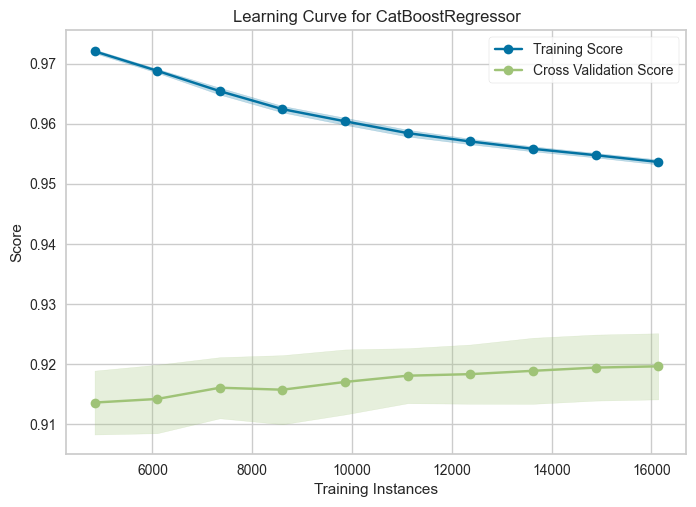

In [86]:
plot_model(best_model, plot="learning")

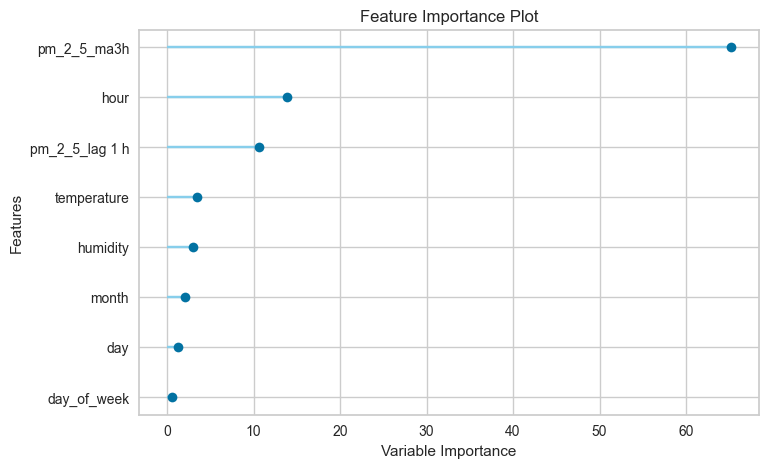

In [87]:
plot_model(best_model, plot="feature")

In [ ]:
print("Train Results:\n", train_results)

# Evaluate บน Test set
test_results = evaluate_model(best_model)

# ดึงค่าประสิทธิภาพของ Test set
test_results = pull()
print("Test Results:\n", test_results)

# เปรียบเทียบค่า R2, RMSE, MAE
train_r2 = train_results.loc[0, "R2"]
test_r2 = test_results.loc[0, "R2"]

train_rmse = train_results.loc[0, "RMSE"]
test_rmse = test_results.loc[0, "RMSE"]

print(f"🔹 Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")
print(f"🔹 Train RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}")

# ตรวจสอบ Overfitting
if train_r2 > 0.95 and (train_r2 - test_r2) > 0.1:
    print("⚠️ Overfitting Detected: โมเดลเรียนรู้ Train ดีเกินไป แต่ Test ไม่ดี")
elif train_rmse < test_rmse:
    print("⚠️ อาจ Overfit: Test RMSE สูงกว่า Train มากเกินไป")
else:
    print("✅ โมเดลน่าจะ Generalize ได้ดี ไม่มี Overfitting มากนัก")

Train Results:
          MAE      MSE    RMSE      R2   RMSLE    MAPE
Fold                                                 
0     2.2834  12.0306  3.4685  0.9329  0.2383  0.3588
1     2.1804  11.6078  3.4070  0.9317  0.2321  0.3036
2     2.2397  12.6084  3.5508  0.9256  0.2432  0.2653
3     2.1380  10.5066  3.2414  0.9349  0.2389  0.2534
4     2.2907  13.1025  3.6197  0.9242  0.2469  0.3578
5     2.4446  15.0922  3.8849  0.9155  0.2541  0.4594
6     2.2934  12.3045  3.5078  0.9309  0.2422  0.3085
7     2.2954  12.9470  3.5982  0.9269  0.2506  0.4690
8     2.2250  12.1897  3.4914  0.9264  0.2397  0.3220
9     2.2292  12.0319  3.4687  0.9282  0.2336  0.2559
Mean  2.2620  12.4421  3.5238  0.9277  0.2420  0.3354
Std   0.0785   1.1227  0.1570  0.0052  0.0066  0.0736


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Test Results:
                 Model     MAE    MSE    RMSE      R2  RMSLE    MAPE
0  CatBoost Regressor  1.9599  9.439  3.0723  0.9324   0.26  0.5995
🔹 Train R²: 0.9329, Test R²: 0.9324
🔹 Train RMSE: 3.4685, Test RMSE: 3.0723
✅ โมเดลน่าจะ Generalize ได้ดี ไม่มี Overfitting มากนัก


# Improve the Model
แก้ไขและปรับปรุงโมเดลให้ดีขึ้น

In [89]:
tuned_model = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.3142,11.9978,3.4638,0.9331,0.2497,0.5345
1,2.2570,12.1744,3.4892,0.9284,0.2440,0.3147
2,2.2897,12.5287,3.5396,0.9260,0.2543,0.2925
3,2.1981,10.8376,3.2920,0.9329,0.2498,0.2683
4,2.3700,13.7478,3.7078,0.9204,0.2578,0.3668
5,2.4702,14.9972,3.8726,0.9160,0.2628,0.5207
6,2.3723,12.5129,3.5374,0.9297,0.2522,0.3563
7,2.3208,12.9399,3.5972,0.9270,0.2594,0.5194
8,2.2979,12.9235,3.5949,0.9220,0.2490,0.3412


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


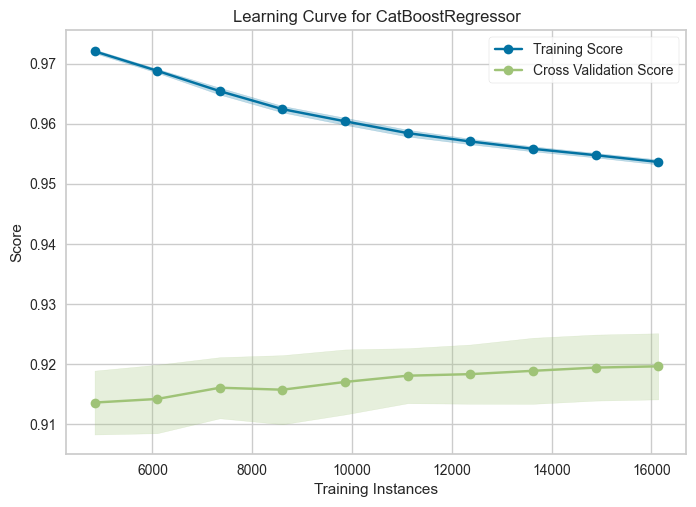

In [90]:
plot_model(tuned_model, plot="learning")

# Save Model

In [91]:
save_model(tuned_model, "models/pm25_model_7d")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['humidity', 'temperature', 'hour',
                                              'day', 'month', 'day_of_week',
                                              'pm_2_5_lag 1 h', 'pm_2_5_ma3h'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('remove_outliers',
                  TransformerWrapper(transformer=RemoveOutliers(random_state=123))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model',
                  <catboost.core.CatBoostRegressor object at 0x0000029377899510>)]),
 'models/pm25_model_7d.pkl')